## Optical Diffraction
Simulation of monochromatic and coherent optical diffraction by
angular spectrum algorithm.

In [1]:
import numpy as np
import os
from skimage.restoration import unwrap_phase
from fringe.utils.io import import_image, import_image_seq, export_image
from fringe.utils.modifiers import ImageToArray, Normalize, MakeComplex
from fringe.solvers.AngularSpectrum import AngularSpectrumSolver as AsSolver

import matplotlib
from matplotlib import pyplot as plt

### Optical Propagation
A given object field can be propagated by a complex convolution with the
free-space optical transfer function:

obj * exp(iz x k_z) = obj * exp(iz x √(k^2 - k_x^2 - k_y^2))

where z is the axial distance. 'AngularSpectrumSolver' class, solves this
convolution by a multiplication in the Fourier space.

#### Step 1: Import Images
- Images can be imported, standardized, normalized, and made complex by the
  dedicated data pipeline designed in this package.
- import_image is the main import function which is able to apply
  post-processing functions on images on import.

In [2]:
# Standardization
p1 = ImageToArray(bit_depth=16, channel='gray', crop_window=None, dtype='float32')
bg = np.ones((512, 512))  # if no background
# Normalization
p2 = Normalize(background=bg)
# Complex Field Generation
p3 = MakeComplex(set_as='amplitude', phase=0)

# Import with the settings
obj = import_image("images/squares.png", preprocessor=[p1, p2, p3])

Image imported from: images/squares.png


#### Solve
- Initialize angular spectrum solver.
- Call solver.solve() and pass the input field, wave number, and z distance.

D:\LocalSoftwareProjects\Fringe\Backend.py:265: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return input_[slc]


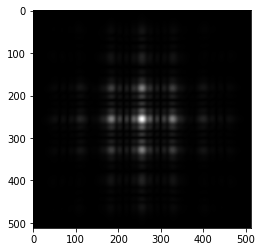

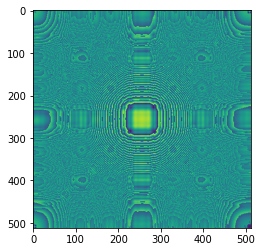

In [3]:
# Initialize Angular Spectrum Solver
solver = AsSolver(shape=obj.shape, dr=1.12, is_batched=False, padding="same",
                  pad_fill_value=0, backend="Numpy")

# Propagate with a given set of k (wavenumber) and z (axial distance)
rec = solver.solve(input_=obj, k=2 * np.pi/532e-3, z=-1000)
amp = np.abs(rec) # Must get squared to simulate intensity acquisition
phase = np.angle(rec) # Phase unwrapping should be applied at this stage

plt.imshow(amp, cmap='gray')
plt.show()
plt.imshow(phase)
plt.show()
